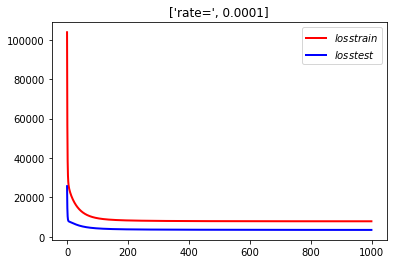

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("F:\\machinelearning\\11.txt")
    return data[0], data[1]

X, y = get_data()
X=X.todense()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from numpy import *
w=mat(zeros((13,1)))
b=np.random.normal()
b1=mat(b)
w1=vstack((w,b1))

def loss(x,y):
    a=len(x)
    kk=mat(ones((a,1)))
    xx=hstack((x, kk))
    y_t=mat(y).T
    tt=y_t -xx*w1
    return (tt.T)*tt

def gradient(x,y):
    a = len(x)
    kk = mat(ones((a, 1)))
    xx = hstack((x, kk))
    xx_t=xx.T
    y_t = mat(y).T
    t1= xx*w1

    return 2*xx_t*(( t1- y_t ))

rate=0.0001
listx=[]
listy=[]
listz=[]
for i in range(1000):
    w1=w1- rate * gradient(X_train,y_train)
    listx.append(i)
    aaa=loss(X_train,y_train)
    aaa2=array(aaa)
    listy.append(aaa2[0][0])
    bbb = loss(X_test, y_test)
    bbb2 = array(bbb)
    listz.append(bbb2[0][0])


plt.figure('model')
plt.plot(listx ,listy, label="$losstrain$",color="red", linewidth=2)
#plt.figure('losstest')
plt.plot(listx ,listz, label="$losstest$",color="blue", linewidth=2)
plt.title(["rate=",rate])
plt.legend()
plt.show()



